**CHATBOTS - Using Natural Language Processing and TensorFlow**

In this notebook, we will build a sophisticated chatbot that can understand the context of sentences and respond appropriately. The project will involve the following key steps:

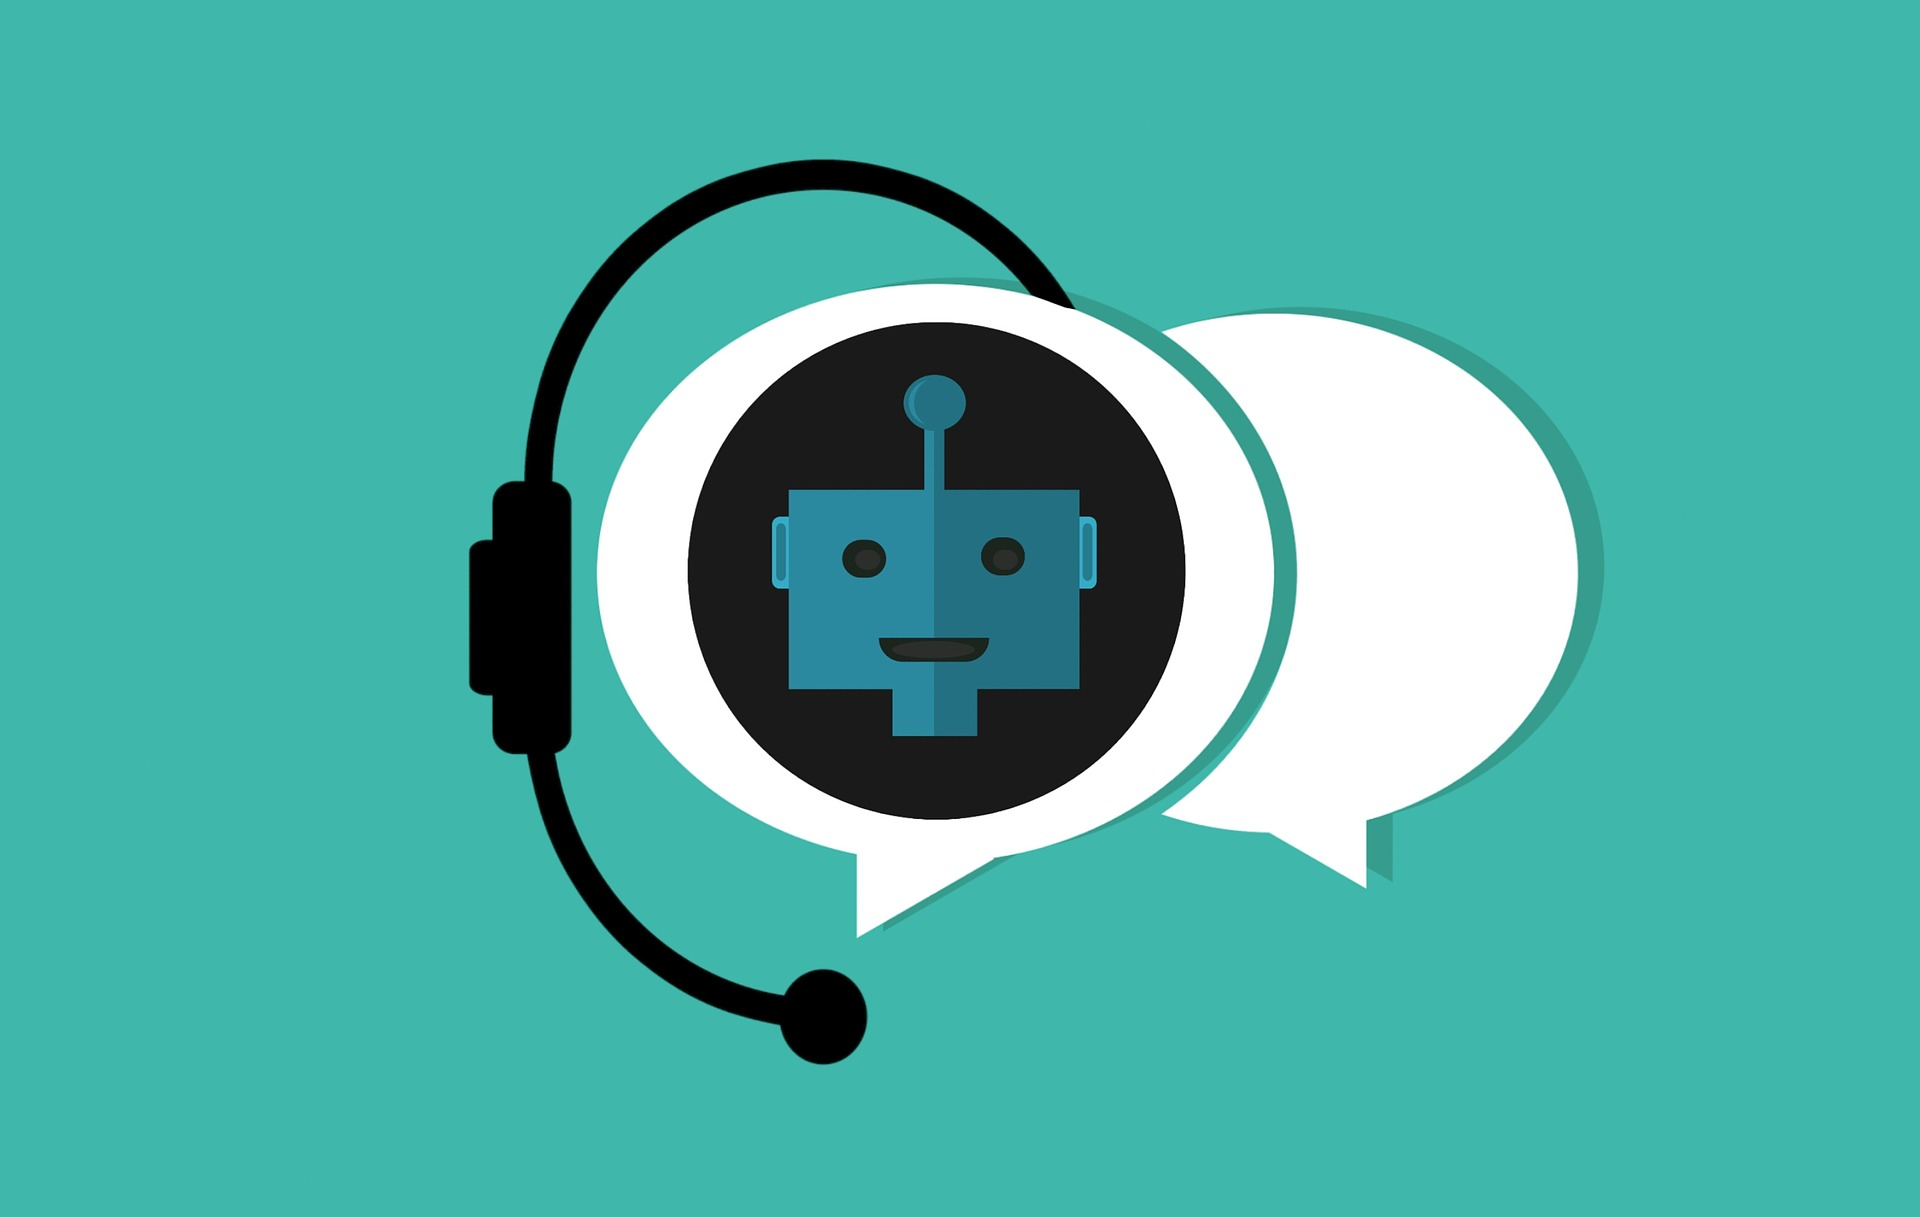
1. **Transforming Conversational Intents into a TensorFlow Model**:
    - We will use Natural Language Processing (NLP) techniques to preprocess and understand conversational intents.
    - A neural network will be built using TFLEARN, a high-level API for TensorFlow, to train the chatbot on these intents.
    - The trained model and relevant data will be saved as a pickle file for future use.

2. **Loading the Model and Pickle File**:
    - The previously saved model and data will be loaded to create a framework that processes user inputs.
    - This framework will leverage the trained neural network to generate context-aware responses.

3. **Processing Inputs and Generating Responses**:
    - We will demonstrate how user inputs are processed through the framework.
    - The chatbot will analyze the inputs and provide appropriate responses based on the learned conversational patterns.

By the end of this project, I  will have a created fully functional chatbot capable of understanding and responding to user queries with contextual accuracy.

Install Necessary Libraries first

In [2]:
!pip install tflearn
!pip install tensorflow
!pip install nltk


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.3/107.3 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=127283 sha256=ef598e83202266b4b28c3c2cac743638e1e7dd916154cdc15f27cfae5722b90c
  Stored in directory: /root/.cache/pip/wheels/55/fb/7b/e06204a0ceefa45443930b9a250cb5ebe31def0e4e8245a465
Successfully built tflearn


Creating intents.json file here

In [3]:

import json
intents= {
    "intents": [
        {
            "tag": "greeting",
            "patterns": ["Hi", "Hello", "How are you", "Is anyone there?", "Good day", "Hey", "What's up?"],
            "responses": ["Hello!", "Hi there!", "Hi, how can I help you?", "Good to see you!", "Hey! How can I assist you today?"],
            "context_set": ""
        },
        {
            "tag": "goodbye",
            "patterns": ["Bye", "See you later", "Goodbye", "I'm leaving", "Have a nice day"],
            "responses": ["Goodbye!", "See you later!", "Have a nice day!", "Bye! Come back soon."],
            "context_set": ""
        },
        {
            "tag": "thanks",
            "patterns": ["Thanks", "Thank you", "That's helpful", "Thanks a lot", "Much appreciated"],
            "responses": ["You're welcome!", "Happy to help!", "Anytime!", "My pleasure!"],
            "context_set": ""
        },
        {
            "tag": "hours",
            "patterns": ["What are your hours?", "When are you open?", "When do you open and close?", "What time do you open?", "What time do you close?"],
            "responses": ["We're open every day from 9am to 9pm.", "Our hours are 9am to 9pm every day.", "We operate from 9am to 9pm daily."],
            "context_set": ""
        },
        {
            "tag": "location",
            "patterns": ["Where are you located?", "What is your address?", "Where can I find you?", "Where is your location?", "What's your location?"],
            "responses": ["We're located at 123 Main St.", "Our address is 123 Main St.", "You can find us at 123 Main St."],
            "context_set": ""
        },
        {
            "tag": "services",
            "patterns": ["What services do you offer?", "Tell me about your services", "Can you help me with XYZ?", "What can you do?", "What do you provide?"],
            "responses": ["We offer a range of services including A, B, and C.", "Our services include A, B, and C. How can I help you?", "We provide A, B, C services. Let me know how I can assist you."],
            "context_set": ""
        },
        {
            "tag": "payments",
            "patterns": ["Do you take credit cards?", "Do you accept Mastercard?", "Are you cash only?", "What payment methods do you accept?", "Can I pay by card?"],
            "responses": ["We accept VISA, Mastercard, and AMEX.", "We accept most major credit cards.", "You can pay with cash or card."],
            "context_set": ""
        },
        {
            "tag": "opentoday",
            "patterns": ["Are you open today?", "When do you open today?", "What are your hours today?", "Is it open today?", "Can I visit today?"],
            "responses": ["We're open today from 9am to 9pm.", "Our hours today are 9am to 9pm.", "Yes, we're open today from 9am to 9pm."],
            "context_set": ""
        },
        {
            "tag": "rental",
            "patterns": ["Can we rent a moped?", "I'd like to rent a moped", "How does this work?", "How can I rent a moped?", "What is the rental process?"],
            "responses": ["Are you looking to rent today or later this week?", "We can help you with the rental process. Are you looking to rent now or later?", "Please specify if you want to rent today or another day."],
            "context_set": "rentalday"
        },
        {
            "tag": "today",
            "patterns": ["today", "Can I rent a moped today?", "Is it possible to rent a moped today?", "Do you have rentals available today?"],
            "responses": ["For rentals today, please call 1-800-MYMOPED.", "Same-day rentals, please call 1-800-MYMOPED.", "You can rent a moped today by calling 1-800-MYMOPED."],
            "context_filter": "rentalday"
        },
        {
            "tag": "price",
            "patterns": ["How much does it cost?", "What is the price?", "What are the charges?", "How much do you charge?", "Can you tell me the price?"],
            "responses": ["Our prices vary depending on the service. Please specify which service you're interested in.", "The cost depends on the specific service. Could you tell me which service you need the price for?", "Please let me know which service you're asking about, and I'll provide the price details."],
            "context_set": ""
        },
        {
            "tag": "appointment",
            "patterns": ["Can I book an appointment?", "How do I schedule an appointment?", "I'd like to make an appointment.", "How can I book a slot?", "Is it possible to book an appointment?"],
            "responses": ["You can book an appointment by calling our office or using our online booking system.", "To schedule an appointment, please visit our website or call us directly.", "Appointments can be booked through our online portal or by phone."],
            "context_set": ""
        },
        {
            "tag": "cancellation",
            "patterns": ["How do I cancel my appointment?", "Can I cancel my booking?", "I'd like to cancel my appointment.", "How can I cancel?", "Is it possible to cancel my appointment?"],
            "responses": ["You can cancel your appointment by calling our office or using our online cancellation form.", "To cancel, please visit our website or call us directly.", "Cancellations can be made through our online portal or by phone."],
            "context_set": ""
        },
        {
            "tag": "reschedule",
            "patterns": ["Can I reschedule my appointment?", "How do I change my booking?", "I'd like to reschedule.", "How can I reschedule?", "Is it possible to change my appointment time?"],
            "responses": ["You can reschedule your appointment by calling our office or using our online rescheduling tool.", "To change your booking, please visit our website or call us directly.", "Rescheduling can be done through our online portal or by phone."],
            "context_set": ""
        },
        {
            "tag": "contact",
            "patterns": ["How can I contact you?", "What is your phone number?", "How do I get in touch?", "Can you give me your contact details?", "How can I reach you?"],
            "responses": ["You can contact us at 1-800-123-4567.", "Our phone number is 1-800-123-4567.", "Feel free to call us at 1-800-123-4567."],
            "context_set": ""
        }
    ]
}


# Save as JSON
with open('intents.json', 'w') as json_file:
    json.dump(intents, json_file, indent=4)

In [5]:
!pip uninstall tflearn
!pip install git+https://github.com/MihaMarkic/tflearn.git@fix/is_sequence_missing

Found existing installation: tflearn 0.5.0
Uninstalling tflearn-0.5.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/tflearn-0.5.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tflearn/*
Proceed (Y/n)? y
  Successfully uninstalled tflearn-0.5.0
  Cloning https://github.com/MihaMarkic/tflearn.git (to revision fix/is_sequence_missing) to /tmp/pip-req-build-y1uruna_
  Running command git clone --filter=blob:none --quiet https://github.com/MihaMarkic/tflearn.git /tmp/pip-req-build-y1uruna_
  Running command git checkout -b fix/is_sequence_missing --track origin/fix/is_sequence_missing
  Switched to a new branch 'fix/is_sequence_missing'
  Branch 'fix/is_sequence_missing' set up to track remote branch 'fix/is_sequence_missing' from 'origin'.
  Resolved https://github.com/MihaMarkic/tflearn.git to commit 6472b8588e758ff4a33a2764d4ee638bbd0e42f0
  Preparing metadata (setup.py) ... done
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=130659 sha

Model Scripts

In [ ]:
# import nltk
# from nltk.stem.lancaster import LancasterStemmer
# import numpy as np
# import tensorflow as tf
# import tflearn
# import random
# import json
# import pickle

# # Download NLTK data
# nltk.download('punkt')

# # Initialize stemmer
# stemmer = LancasterStemmer()

# # Load the intents file
# with open('intents.json') as file:
#     data = json.load(file)

# # Initialize lists for words, classes, documents, and ignore words
# words = []
# classes = []
# documents = []
# ignore_words = ['?', '!', '.', ',']

# # Process the intents file
# for intent in data['intents']:
#     for pattern in intent['patterns']:
#         # Tokenize each word in the sentence
#         w = nltk.word_tokenize(pattern)
#         words.extend(w)
#         # Add the document to the corpus
#         documents.append((w, intent['tag']))
#         # Add the tag to the class list
#         if intent['tag'] not in classes:
#             classes.append(intent['tag'])

# # Stem and lower each word and remove duplicates
# words = [stemmer.stem(w.lower()) for w in words if w not in ignore_words]
# words = sorted(list(set(words)))

# # Sort classes
# classes = sorted(list(set(classes)))

# # Create training data
# training = []
# output = []
# # Create an empty array for output
# output_empty = [0] * len(classes)

# # Create the training set, bag of words for each sentence
# for doc in documents:
#     # Initialize bag of words
#     bag = []
#     # List of tokenized words for the pattern
#     pattern_words = doc[0]
#     # Stem each word
#     pattern_words = [stemmer.stem(word.lower()) for word in pattern_words]
#     # Create bag of words array
#     for w in words:
#         bag.append(1) if w in pattern_words else bag.append(0)

#     # Output is a '0' for each tag and '1' for current tag
#     output_row = list(output_empty)
#     output_row[classes.index(doc[1])] = 1

#     training.append([bag, output_row])

# # Shuffle the features and turn into np.array
# random.shuffle(training)
# training = np.array(training, dtype=object)

# # Create train and test lists
# train_x = np.array(list(training[:,0]))
# train_y = np.array(list(training[:,1]))

# # Reset underlying graph data
# tf.compat.v1.reset_default_graph()

# # Build neural network
# net = tflearn.input_data(shape=[None, len(train_x[0])])
# net = tflearn.fully_connected(net, 16)
# net = tflearn.fully_connected(net, 16)
# net = tflearn.fully_connected(net, len(train_y[0]), activation='softmax')
# net = tflearn.regression(net)

# # Define model and setup tensorboard
# model = tflearn.DNN(net, tensorboard_dir='tflearn_logs')

# # Start training (apply gradient descent algorithm)
# model.fit(train_x, train_y, n_epoch=200, batch_size=8, show_metric=True)
# model.save('model.tflearn')

# # Save training data
# pickle.dump({'words': words, 'classes': classes, 'train_x': train_x, 'train_y': train_y}, open("training_data.json", "wb"))



Training Step: 1999  | total loss: 0.00869 | time: 0.046s
| Adam | epoch: 200 | loss: 0.00869 - acc: 1.0000 -- iter: 72/76
Training Step: 2000  | total loss: 0.00876 | time: 0.052s
| Adam | epoch: 200 | loss: 0.00876 - acc: 1.0000 -- iter: 76/76
--


In [6]:
#Used in Tensorflow Model
import numpy as np
import tensorflow as tf
import tflearn
import random

#Usde to for Contextualisation and Other NLP Tasks.
import nltk
from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()

#Other
import json
import pickle
import warnings
warnings.filterwarnings("ignore")

In [7]:
print("Processing the Intents.....")
with open('intents.json') as json_data:
    intents = json.load(json_data)

Processing the Intents.....


download the punkt resource using NLTK's downloader.

In [9]:

nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [11]:
words = []
classes = []
documents = []
ignore_words = ['?']
print("Looping through the Intents to Convert them to words, classes, documents and ignore_words.......")
for intent in intents['intents']:
    for pattern in intent['patterns']:
        # tokenize each word in the sentence
        w = nltk.word_tokenize(pattern)
        # add to our words list
        words.extend(w)
        # add to documents in our corpus
        documents.append((w, intent['tag']))
        # add to our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

Looping through the Intents to Convert them to words, classes, documents and ignore_words.......


In [12]:
print("Stemming, Lowering and Removing Duplicates.......")
words = [stemmer.stem(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))

# remove duplicates
classes = sorted(list(set(classes)))

print (len(documents), "documents")
print (len(classes), "classes", classes)
print (len(words), "unique stemmed words", words)

Stemming, Lowering and Removing Duplicates.......
76 documents
15 classes ['appointment', 'cancellation', 'contact', 'goodbye', 'greeting', 'hours', 'location', 'opentoday', 'payments', 'price', 'rental', 'reschedule', 'services', 'thanks', 'today']
100 unique stemmed words ["'d", "'m", "'s", '.', 'a', 'about', 'acceiv', 'address', 'an', 'and', 'anyon', 'appoint', 'apprecy', 'ar', 'avail', 'book', 'by', 'bye', 'can', 'cancel', 'card', 'cash', 'chang', 'charg', 'clos', 'contact', 'cost', 'credit', 'day', 'detail', 'do', 'doe', 'find', 'get', 'giv', 'good', 'goodby', 'hav', 'hello', 'help', 'hey', 'hi', 'hour', 'how', 'i', 'in', 'is', 'it', 'lat', 'leav', 'lik', 'loc', 'lot', 'mak', 'mastercard', 'me', 'method', 'mop', 'much', 'my', 'nic', 'numb', 'off', 'on', 'op', 'pay', 'phon', 'poss', 'pric', 'process', 'provid', 'reach', 'rent', 'resched', 'schedule', 'see', 'serv', 'slot', 'tak', 'tel', 'thank', 'that', 'the', 'ther', 'thi', 'tim', 'to', 'today', 'touch', 'up', 'visit', 'we', 'what

In [16]:
import numpy as np
import random
import tensorflow as tf

print("Creating the Data for our Model.....")
training = []
output = []
print("Creating a List (Empty) for Output.....")
output_empty = [0] * len(classes)

print("Creating Training Set, Bag of Words for our Model....")
for doc in documents:
    # Initialize our bag of words
    bag = []
    # List of tokenized words for the pattern
    pattern_words = doc[0]
    # Stem each word
    pattern_words = [stemmer.stem(word.lower()) for word in pattern_words]
    # Create our bag of words array
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)

    # Output is a '0' for each tag and '1' for the current tag
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1

    training.append([bag, output_row])

print("Shuffling Randomly and Converting into Numpy Array for Faster Processing......")
random.shuffle(training)

# Separate the features and labels
train_x = np.array([example[0] for example in training])
train_y = np.array([example[1] for example in training])

print("Creating Train and Test Lists.....")
print("Building Neural Network for Our Chatbot to be Contextual....")
print("Resetting graph data....")
tf.compat.v1.reset_default_graph()  # Updated for TensorFlow 2.x compatibility

# Proceed with building your neural network using TensorFlow


Creating the Data for our Model.....
Creating a List (Empty) for Output.....
Creating Training Set, Bag of Words for our Model....
Shuffling Randomly and Converting into Numpy Array for Faster Processing......
Creating Train and Test Lists.....
Building Neural Network for Our Chatbot to be Contextual....
Resetting graph data....


In [17]:
net = tflearn.input_data(shape=[None, len(train_x[0])])
net = tflearn.fully_connected(net, 8)
net = tflearn.fully_connected(net, 8)
net = tflearn.fully_connected(net, len(train_y[0]), activation='softmax')
net = tflearn.regression(net)
print("Training....")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Training....


In [18]:
model = tflearn.DNN(net, tensorboard_dir='tflearn_logs')

In [19]:
print("Training the Model.......")
model.fit(train_x, train_y, n_epoch=1000, batch_size=8, show_metric=True)
print("Saving the Model.......")
model.save('model.tflearn')

Training Step: 9999  | total loss: 0.00056 | time: 0.041s
| Adam | epoch: 1000 | loss: 0.00056 - acc: 1.0000 -- iter: 72/76
Training Step: 10000  | total loss: 0.00057 | time: 0.047s
| Adam | epoch: 1000 | loss: 0.00057 - acc: 1.0000 -- iter: 76/76
--
Saving the Model.......


In [20]:
print("Pickle is also Saved..........")
pickle.dump( {'words':words, 'classes':classes, 'train_x':train_x, 'train_y':train_y}, open( "training_data", "wb" ) )

Pickle is also Saved..........


In [21]:
print("Loading Pickle.....")
data = pickle.load( open( "training_data", "rb" ) )
words = data['words']
classes = data['classes']
train_x = data['train_x']
train_y = data['train_y']


with open('intents.json') as json_data:
    intents = json.load(json_data)

print("Loading the Model......")
# load our saved model
model.load('./model.tflearn')

Loading Pickle.....
Loading the Model......


In [22]:
def clean_up_sentence(sentence):
    # It Tokenize or Break it into the constituents parts of Sentense.
    sentence_words = nltk.word_tokenize(sentence)
    # Stemming means to find the root of the word.
    sentence_words = [stemmer.stem(word.lower()) for word in sentence_words]
    return sentence_words

# Return the Array of Bag of Words: True or False and 0 or 1 for each word of bag that exists in the Sentence
def bow(sentence, words, show_details=False):
    sentence_words = clean_up_sentence(sentence)
    bag = [0]*len(words)
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s:
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % w)
    return(np.array(bag))

ERROR_THRESHOLD = 0.25
print("ERROR_THRESHOLD = 0.25")

def classify(sentence):
    # Prediction or To Get the Posibility or Probability from the Model
    results = model.predict([bow(sentence, words)])[0]
    # Exclude those results which are Below Threshold
    results = [[i,r] for i,r in enumerate(results) if r>ERROR_THRESHOLD]
    # Sorting is Done because heigher Confidence Answer comes first.
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append((classes[r[0]], r[1])) #Tuppl -> Intent and Probability
    return return_list

def response(sentence, userID='123', show_details=False):
    results = classify(sentence)
    # That Means if Classification is Done then Find the Matching Tag.
    if results:
        # Long Loop to get the Result.
        while results:
            for i in intents['intents']:
                # Tag Finding
                if i['tag'] == results[0][0]:
                    # Random Response from High Order Probabilities
                    return print(random.choice(i['responses']))

            results.pop(0)

ERROR_THRESHOLD = 0.25


In [23]:
while True:
    input_data = input("You- ")
    answer = response(input_data)
    answer


You- hi
Hey! How can I assist you today?
You- can you help me
We offer a range of services including A, B, and C.
You- what kind of service you offer 
Our services include A, B, and C. How can I help you?
You- please suggest some service
We're open today from 9am to 9pm.
You- popular service
Yes, we're open today from 9am to 9pm.
You- yea
Hello!
You- geetings
Hi there!
You- how are you
Good to see you!
You- nice to meet you too
See you later!
You- byee
Have a nice day!
You- close
Hey! How can I assist you today?
You- wrong
Hey! How can I assist you today?
You- 
Hi, how can I help you?
You- 
Hi there!
You- 
Hi there!
You- 
Hi there!
You- 
Hello!
You- 
Hi there!
You- you fool
Good to see you!
You- manage my task
Bye! Come back soon.
You- give me some suggestion for movie
To change your booking, please visit our website or call us directly.
You- goodbye
Bye! Come back soon.


KeyboardInterrupt: Interrupted by user

In [ ]:
# # Convert numpy arrays to lists
# train_x_list = train_x.tolist()
# train_y_list = train_y.tolist()

# # Create a dictionary to hold the training data
# training_data = {
#     'words': words,
#     'classes': classes,
#     'train_x': train_x_list,
#     'train_y': train_y_list
# }

# # Save training data as JSON
# with open("training_data.json", "w") as json_file:
#     json.dump(training_data, json_file)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# import json
# import random
# import numpy as np
# import tflearn
# import tensorflow as tf
# from tensorflow.python.framework import ops

# # Load training data
# with open('training_data.json', 'r') as file:
#     data = json.load(file)

# # Extract data
# words = data['words']
# classes = data['classes']
# train_x = np.array(data['train_x'])
# train_y = np.array(data['train_y'])

# # Reset the graph
# ops.reset_default_graph()

# # Build the neural network
# net = tflearn.input_data(shape=[None, len(train_x[0])])
# net = tflearn.fully_connected(net, 8)
# net = tflearn.fully_connected(net, 8)
# net = tflearn.fully_connected(net, len(train_y[0]), activation='softmax')
# net = tflearn.regression(net)

# # Define the model and load the trained model
# model = tflearn.DNN(net)
# # model.load('model.tflearn')

# def clean_up_sentence(sentence):
#     # Tokenize the pattern
#     sentence_words = nltk.word_tokenize(sentence)
#     # Stem each word
#     sentence_words = [stemmer.stem(word.lower()) for word in sentence_words]
#     return sentence_words

# def bow(sentence, words):
#     # Tokenize the pattern
#     sentence_words = clean_up_sentence(sentence)
#     # Bag of words
#     bag = [0]*len(words)
#     for s in sentence_words:
#         for i, w in enumerate(words):
#             if w == s:
#                 bag[i] = 1
#     return np.array(bag)

# def classify(sentence):
#     ERROR_THRESHOLD = 0.25
#     # Generate probabilities from the model
#     results = model.predict([bow(sentence, words)])[0]
#     # Filter out predictions below a threshold
#     results = [[i, r] for i, r in enumerate(results) if r > ERROR_THRESHOLD]
#     # Sort by strength of probability
#     results.sort(key=lambda x: x[1], reverse=True)
#     return_list = []
#     for r in results:
#         return_list.append((classes[r[0]], r[1]))
#     return return_list

# def response(sentence, user_id='123', show_details=False):
#     results = classify(sentence)
#     if results:
#         # Pick the first result
#         for i in data['intents']:
#             if i['tag'] == results[0][0]:
#                 return random.choice(i['responses'])
#     return "I'm sorry, I didn't understand that."

# # Testing the chatbot
# print(response("Hi"))


I'm sorry, I didn't understand that.


In [ ]:
print(response("greeting"))


I'm sorry, I didn't understand that.
